# Кластеризация

Цель задачи кластеризации -- разбить объекты на кластеры так, чтобы схожие объекты оказались в одном кластере, а различные -- в разных.

## Алгоритм K-Means

Одним из популярных алгоритмов кластеризации является алгоритм K-Means. Опишем этот алгоритм.
1. Разобьём объекты на кластеры произвольным образом
2. Повторяем до сходимости:
* E-шаг: найдём текущие центы кластеров $\mu_i$;
* M-шаг: переразметим объекты, отнеся каждый объект к кластеру, центр $\mu_i$ которого ближе всех.

### Задание: реализуйте алгоритм K-Means

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
a = np.arange(6).reshape(3,2)
a

array([[0, 1],
       [2, 3],
       [4, 5]])

In [8]:
np.mean(a, axis=0)

array([2., 3.])

In [9]:
np.linalg.norm([1,3,4])

5.0990195135927845

In [15]:
class EMAlgorithm:
    def __init__(self, points, n_clusters=3):
        self.points = points
        self.n_clusters = n_clusters
        self.labels = np.random.randint(n_clusters, size=points.shape[0])
        
    def e_step(self):
        means = []
        for cluster in range(self.n_clusters):
            cluster_points = self.points[self.labels == cluster]
            mean = np.mean(cluster_points, axis=0)
            means.append(mean)
        self.means = np.stack(means, axis=0)
    
    def m_step(self):
        labels = []
        for i in range(self.points.shape[0]):
            distances = np.linalg.norm(self.means - self.points[i], axis=1)
            distances = np.sum((self.means - self.points[i]) ** 2, axis=1) ** 0.5
            label = np.argmin(distances)
            labels.append(label)
        self.labels = np.array(labels)
    
    def visualize(self, title=''):
        plt.figure(figsize=(10,10))
        plt.title('Visualize ' + title)
        plt.scatter(self.means[:, 0], self.means[:, 1], c='red', s=150, 
                    label='cluster centers')
        
        lines = [[self.points[i], self.means[self.labels[i]]] 
                 for i in range(len(self.labels))]
        
        for i, line in enumerate(lines):
            plt.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], 
                     color='black', 
                     linestyle='dashed', 
                     linewidth=1)
        plt.scatter(self.points[:, 0], self.points[:, 1], c=self.labels, s=50)
        plt.legend()
        plt.show()

Сгенерируем искусственные данные 

In [16]:
from sklearn.datasets import make_blobs

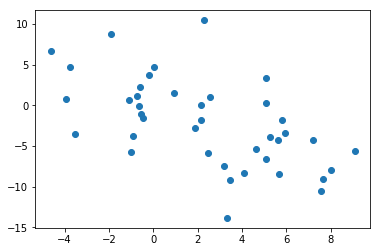

In [24]:
points = make_blobs(n_samples=40, centers=4, cluster_std=3)[0]
plt.scatter(points[:, 0], points[:, 1])

Посмотрим, как алгоритм работает на искусственных данных.

In [18]:
from IPython.display import clear_output
import time

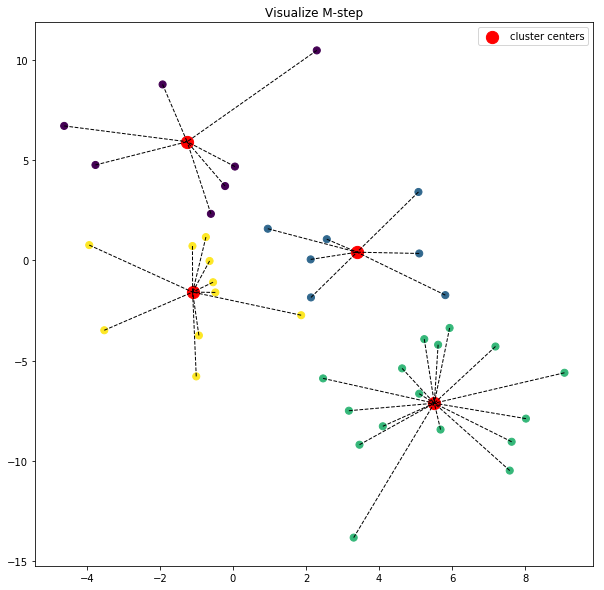

KeyboardInterrupt: 

In [25]:
alg = EMAlgorithm(points, n_clusters=4)
for i in range(10):
    alg.e_step()
    clear_output()
    alg.visualize('E-step')
    time.sleep(2)
    alg.m_step()
    clear_output()
    alg.visualize('M-step')
    time.sleep(2)

## Выделение сегментов клиентов банка с помощью кластеризации

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_excel("clust_sample_dev_100k.xlsx")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
идентификатор клиента                                                      100000 non-null int64
Сумма полной задолженности по кредитным картам                             100000 non-null float64
Количество активных ипотечных кредитов                                     100000 non-null int64
Количество закрытых ипотечных кредитов                                     100000 non-null int64
Суммарная задолженность по всем кредитам                                   100000 non-null float64
Суммарный баланс по всем счетам дебетовых карт клиента                     100000 non-null float64
Общая сумма списаний со всех счетов клиента за месяц                       100000 non-null float64
Зарплатный клиент (флаг)                                                   100000 non-null int64
Средняя сумма зарплатных начислений по всем счетам клиента за 3 месяца     100000 non-null float64
Средняя

In [3]:
pd.set_option('display.max_columns', None)

In [17]:
data.describe()

,идентификатор клиента,Сумма полной задолженности по кредитным картам,Количество активных ипотечных кредитов,Количество закрытых ипотечных кредитов,Суммарная задолженность по всем кредитам,Суммарный баланс по всем счетам дебетовых карт клиента,Общая сумма списаний со всех счетов клиента за месяц,Зарплатный клиент (флаг),Средняя сумма зарплатных начислений по всем счетам клиента за 3 месяца,Средняя сумма социальных начислений по всем счетам клиента за 3 месяца,Суммарный баланс по всем пассивным счетам клиента,Возраст,Населенный пункт - город с населением более 1 млн. человек (флаг),Населенный пункт - город с населением менее 1 млн. человек (флаг),Населенный пункт - деревня (флаг),Населенный пункт не известен,Высше образование (флаг),Образование среднее или ниже (флаг),Образование не известно (флаг),Не женат/не замужем (флаг),Женат/замужем (флаг),Семейное положение не известно (флаг),Клиент принадлежит к сегменту MASS (флаг),Клиент принадлежит к сегменту SOCIAL(флаг),Клиент принадлежит к сегменту YOUTH (флаг),Клиент принадлежит к сегменту MVS (флаг),Клиент принадлежит к сегменту VIP(флаг)
count,99998.000000,99998.000000,99998.000000,99998.000000,9.999800e+04,9.999800e+04,9.999800e+04,99998.000000,99998.000000,99998.000000,9.999800e+04,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000,99998.000000
mean,50000.197774,11867.042381,0.104642,0.037841,1.619981e+05,3.100555e+04,9.508677e+04,0.957419,33128.519703,2853.632847,9.412448e+04,43.201530,0.152233,0.399798,0.088122,0.359847,0.138193,0.145753,0.716054,0.099882,0.180464,0.719654,0.598622,0.208044,0.014090,0.171653,0.007590
std,28867.814674,21093.189766,0.315647,0.199272,4.275186e+05,9.215470e+04,2.115541e+05,0.201911,36114.635911,6241.084713,3.309597e+05,10.643012,0.359248,0.489859,0.283473,0.479958,0.345104,0.352860,0.450913,0.299844,0.384575,0.449170,0.490180,0.405911,0.117864,0.377081,0.086791
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.150000,0.000000,0.000000e+00,13.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25000.250000,0.000000,0.000000,0.000000,0.000000e+00,2.298573e+03,2.728594e+04,1.000000,13760.485000,0.000000,3.543610e+03,34.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49999.500000,0.000000,0.000000,0.000000,1.051606e+04,8.419080e+03,4.744298e+04,1.000000,24585.770000,0.000000,1.312824e+04,42.230000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,74999.750000,15428.815000,0.000000,0.000000,1.050653e+05,2.524893e+04,8.947264e+04,1.000000,40853.652500,0.000000,5.096161e+04,52.460000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,100000.000000,99999.240000,4.000000,4.000000,9.842669e+06,6.778721e+06,9.801463e+06,1.000000,981638.080000,144342.000000,9.927653e+06,92.260000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Нахождение выбросов
Выбросы в данных помешают хорошей кластеризации. Найдите выбросы в графе "Суммарная задолженность по кредитам" и избавьтесь от них.

In [6]:
threshold = 2e7
data = data[data['Суммарная задолженность по всем кредитам'] < threshold]

In [7]:
data_to_cluster = data.copy()

### Анализ признаков
Распределение признаков важно для последующей кластеризации. Найдите признаки, распределение которых вас не устраивает, и преобразуйте их соответственно. Некоторые признаки очень часто равны 0. Бинаризуйте такие вхождения.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6405c8c780>,
      dtype=object)

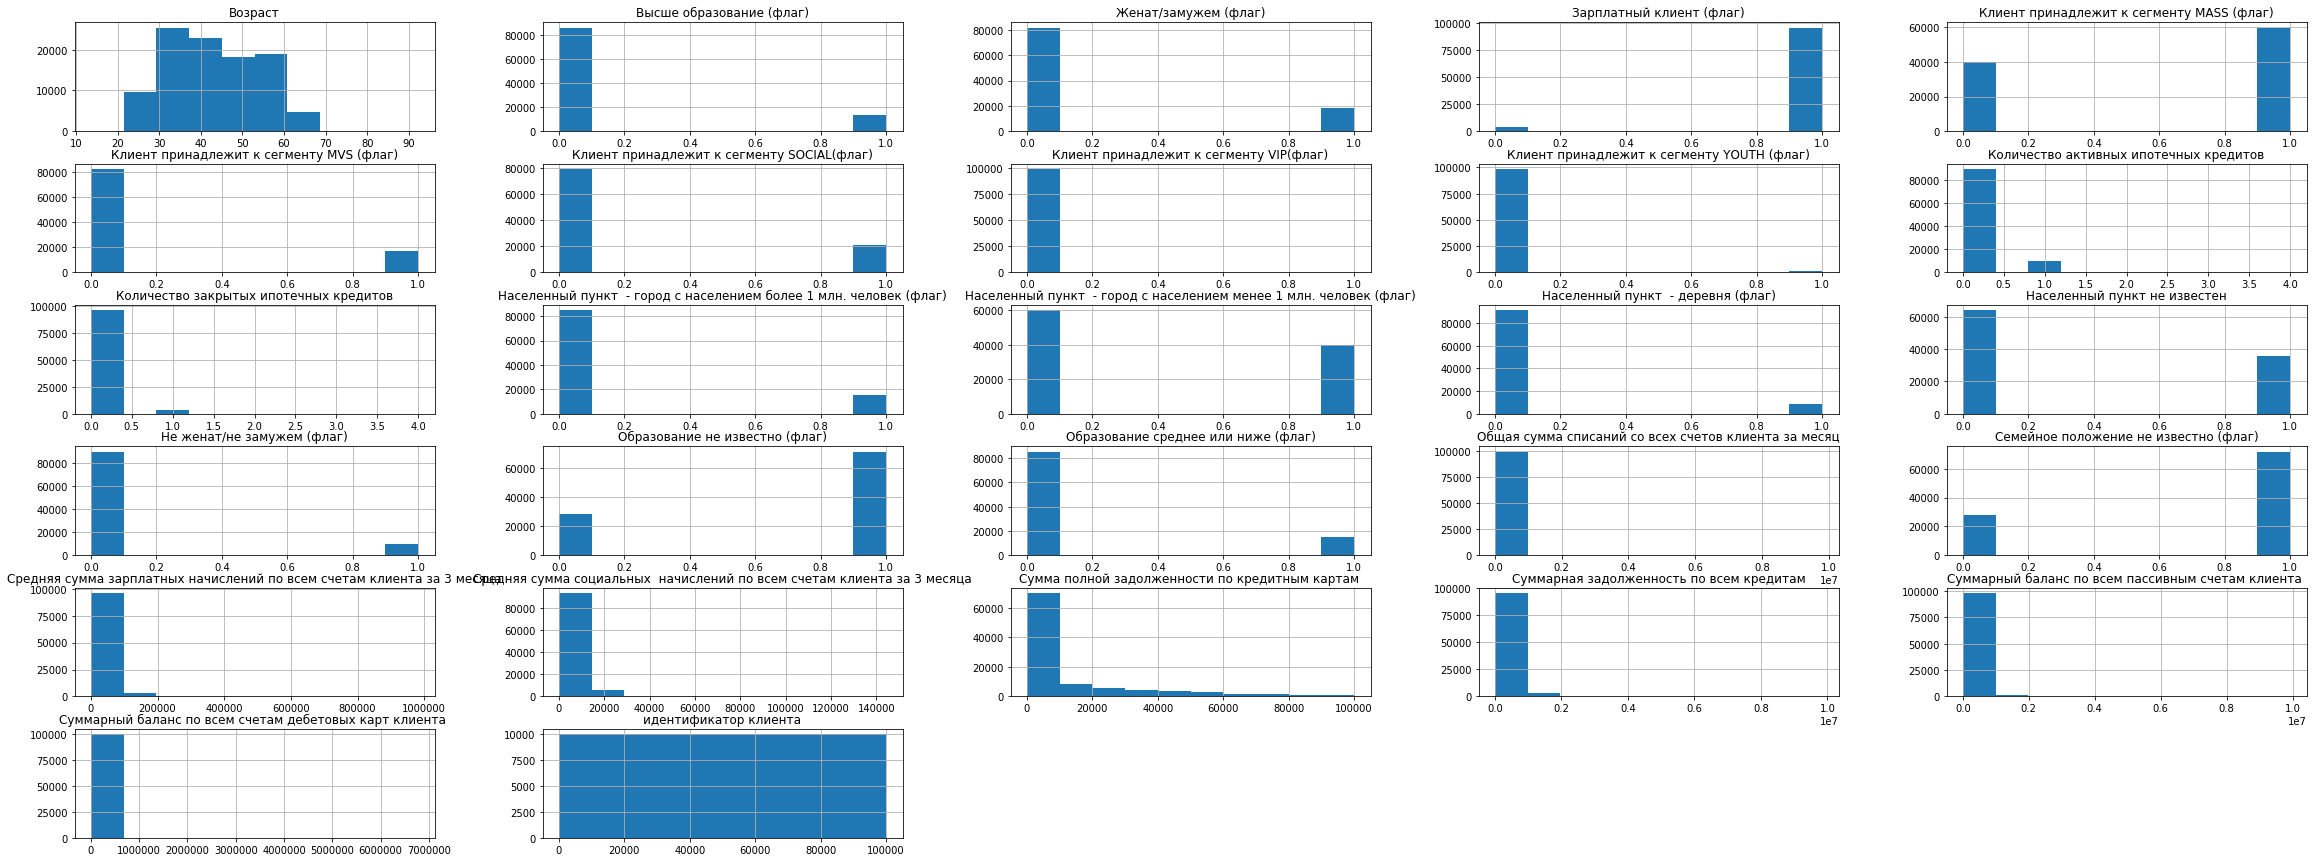

In [13]:
data.hist(figsize=(40,15))

In [28]:
np.flip(np.sort(data['Суммарный баланс по всем счетам дебетовых карт клиента '].values))[400]

595166.89

In [15]:
np.flip(np.sort(data_to_cluster['Сумма полной задолженности по кредитным картам '].values))[:10]

array([99999.24, 99987.1 , 99968.97, 99960.79, 99957.99, 99939.73,
       99930.71, 99928.03, 99916.81, 99905.45])

In [35]:
data.columns

Index(['идентификатор клиента',
       'Сумма полной задолженности по кредитным картам ',
       'Количество активных ипотечных кредитов',
       'Количество закрытых ипотечных кредитов',
       'Суммарная задолженность по всем кредитам',
       'Суммарный баланс по всем счетам дебетовых карт клиента ',
       'Общая сумма списаний со всех счетов клиента за месяц',
       'Зарплатный клиент (флаг)',
       'Средняя сумма зарплатных начислений по всем счетам клиента за 3 месяца',
       'Средняя сумма социальных  начислений по всем счетам клиента за 3 месяца',
       'Суммарный баланс по всем пассивным счетам клиента ', 'Возраст',
       'Населенный пункт  - город с населением более 1 млн. человек (флаг)',
       'Населенный пункт  - город с населением менее 1 млн. человек (флаг)',
       'Населенный пункт  - деревня (флаг)', 'Населенный пункт не известен',
       'Высше образование (флаг)', 'Образование среднее или ниже (флаг)',
       'Образование не известно (флаг)', 'Не женат/не зам

In [8]:
numeric_columns = ['Сумма полной задолженности по кредитным картам ',
                   'Суммарная задолженность по всем кредитам',
                   'Суммарный баланс по всем счетам дебетовых карт клиента ',
                   'Общая сумма списаний со всех счетов клиента за месяц',
                   'Средняя сумма зарплатных начислений по всем счетам клиента за 3 месяца',
                   'Средняя сумма социальных  начислений по всем счетам клиента за 3 месяца',
                   'Суммарный баланс по всем пассивным счетам клиента ']

In [9]:
for item in numeric_columns:
    sigma = np.std(data_to_cluster[item])
    mean = np.mean(data_to_cluster[item])
    data_to_cluster[item] = data_to_cluster[item].clip(lower=0, 
                                    upper=mean + 3 * sigma)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6408a61e10>,
      dtype=object)

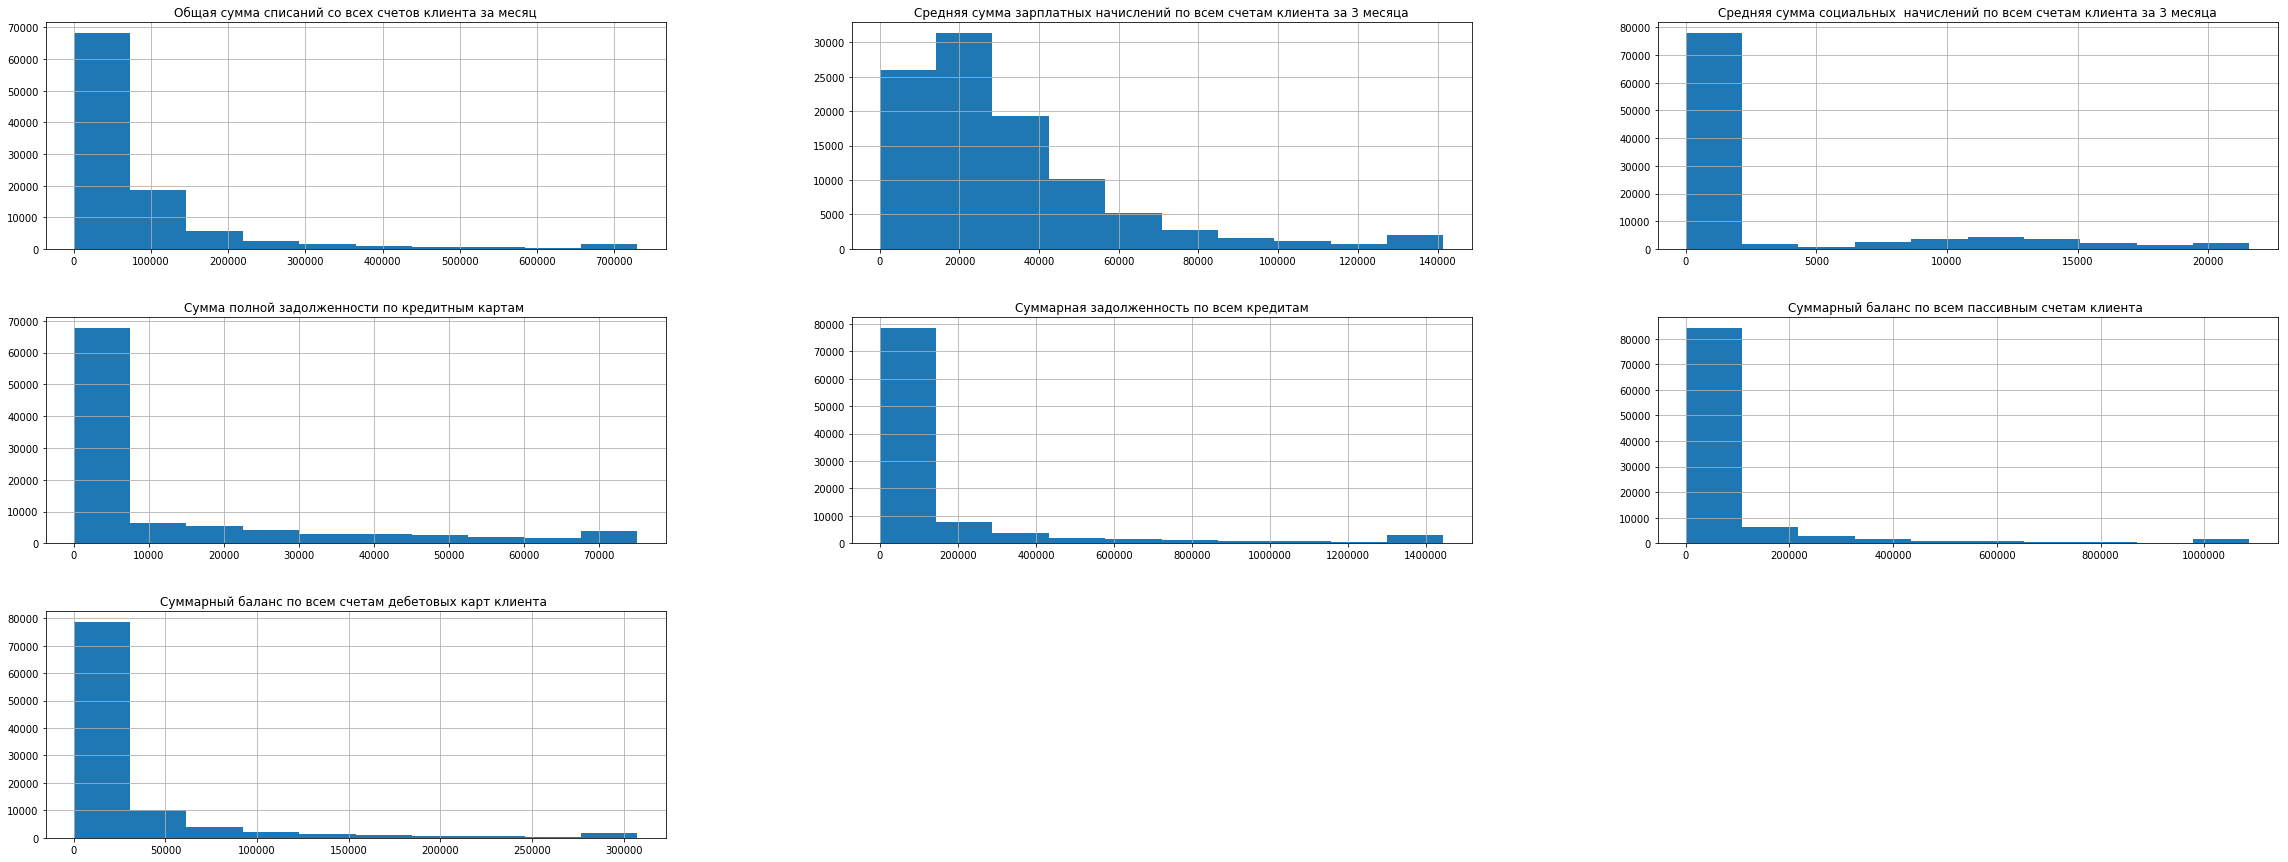

In [36]:
data_to_cluster[numeric_columns].hist(figsize=(40,15))

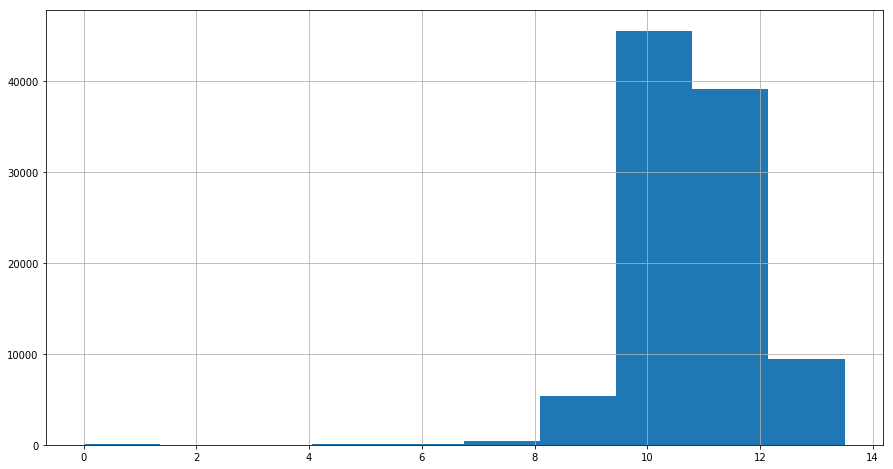

In [42]:
np.log(data_to_cluster[numeric_columns[3]] + 1).hist(figsize=(15,8))

In [10]:
for item in numeric_columns:
    data_to_cluster[item] = np.log(data_to_cluster[item] + 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64065c7eb8>,
      dtype=object)

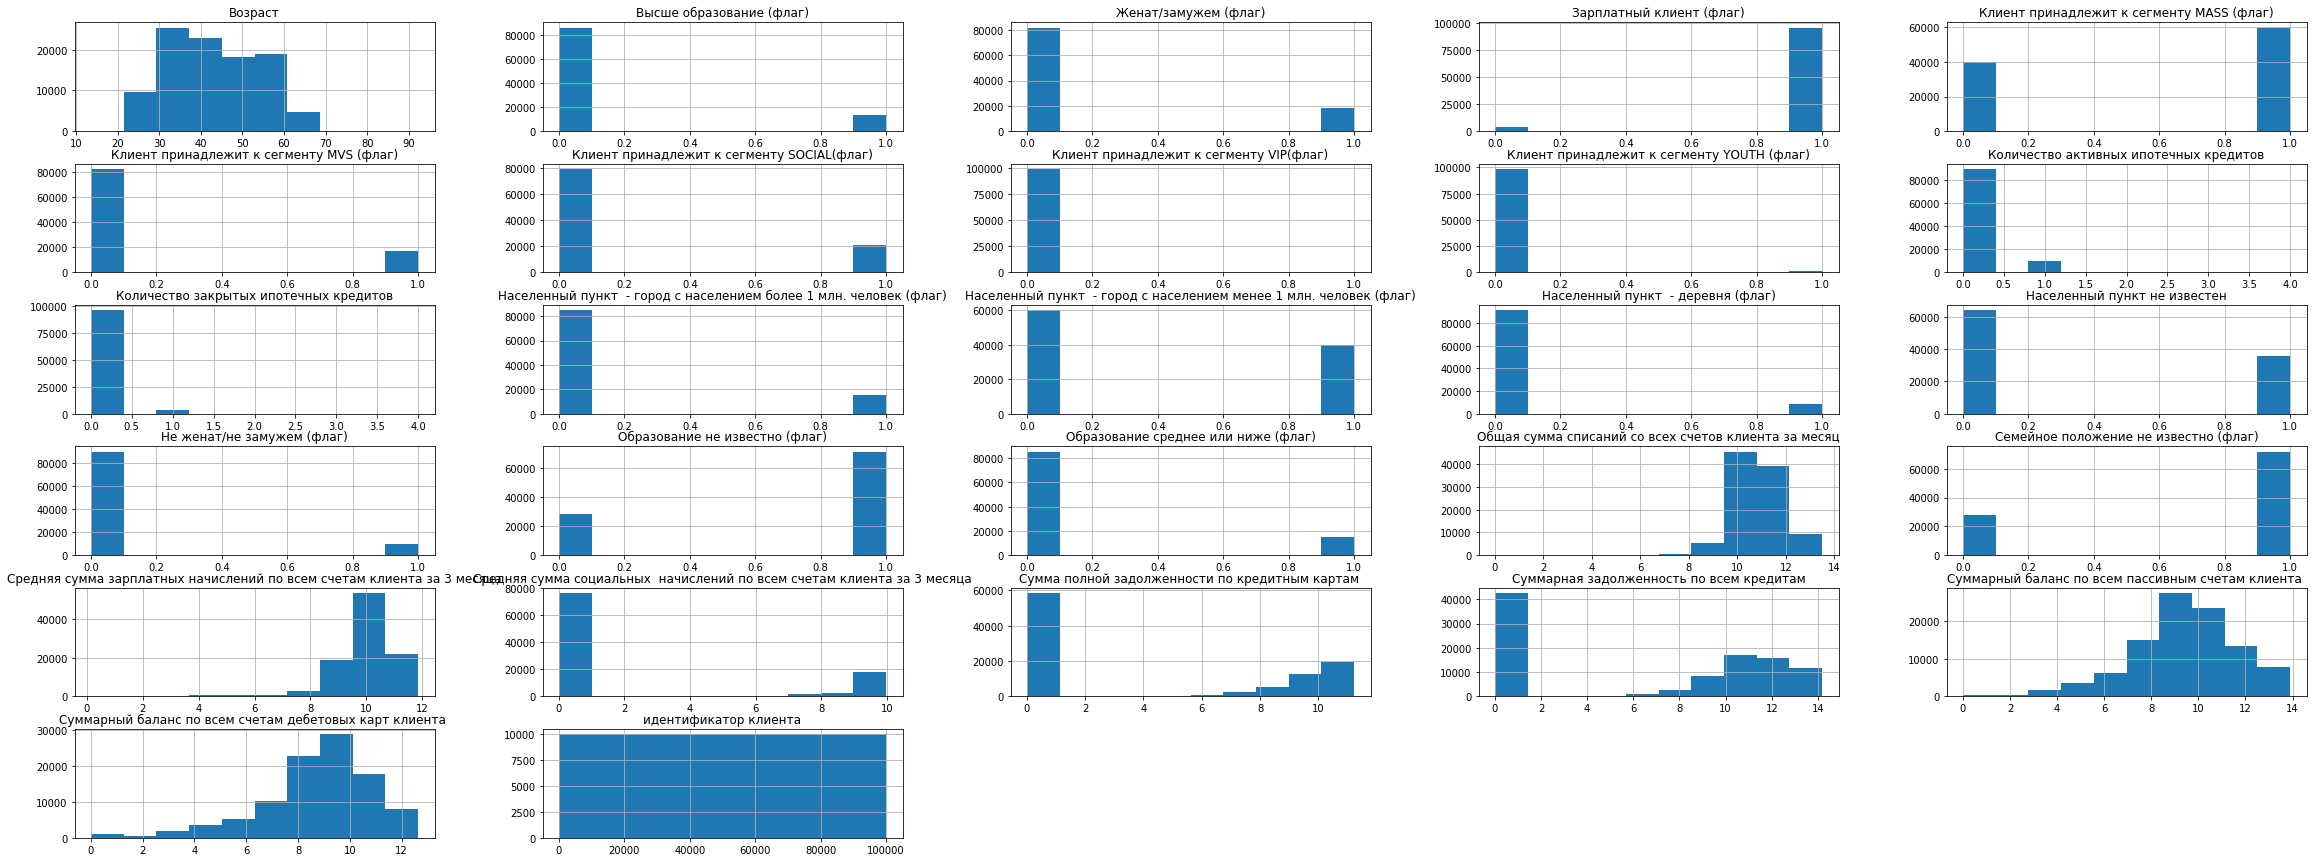

In [44]:
data_to_cluster.hist(figsize=(40,15))

### Примените нормировку данных к признакам

In [11]:
from sklearn.preprocessing import scale

In [48]:
scale(np.arange(6).reshape(3,2), axis=0)

/home/yury/ml_shad/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


array([[-1.22474487, -1.22474487],
       [ 0.        ,  0.        ],
       [ 1.22474487,  1.22474487]])

In [12]:
data_to_cluster = pd.DataFrame(scale(data_to_cluster.values, axis=0), columns=data_to_cluster.columns)

In [13]:
data_to_cluster.describe()

,идентификатор клиента,Сумма полной задолженности по кредитным картам,Количество активных ипотечных кредитов,Количество закрытых ипотечных кредитов,Суммарная задолженность по всем кредитам,Суммарный баланс по всем счетам дебетовых карт клиента,Общая сумма списаний со всех счетов клиента за месяц,Зарплатный клиент (флаг),Средняя сумма зарплатных начислений по всем счетам клиента за 3 месяца,Средняя сумма социальных начислений по всем счетам клиента за 3 месяца,Суммарный баланс по всем пассивным счетам клиента,Возраст,Населенный пункт - город с населением более 1 млн. человек (флаг),Населенный пункт - город с населением менее 1 млн. человек (флаг),Населенный пункт - деревня (флаг),Населенный пункт не известен,Высше образование (флаг),Образование среднее или ниже (флаг),Образование не известно (флаг),Не женат/не замужем (флаг),Женат/замужем (флаг),Семейное положение не известно (флаг),Клиент принадлежит к сегменту MASS (флаг),Клиент принадлежит к сегменту SOCIAL(флаг),Клиент принадлежит к сегменту YOUTH (флаг),Клиент принадлежит к сегменту MVS (флаг),Клиент принадлежит к сегменту VIP(флаг)
count,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04,9.999800e+04
mean,2.091880e-16,6.082367e-17,-7.958238e-18,-2.671694e-17,1.937689e-16,7.077147e-16,3.241561e-16,-3.269983e-16,3.714792e-16,-5.542344e-17,6.625233e-16,1.426798e-16,1.193736e-17,-1.989559e-17,2.501160e-17,7.162414e-17,-1.449536e-17,9.578308e-17,-6.935036e-17,5.627611e-17,6.935036e-17,5.314966e-17,2.842228e-17,-3.410673e-17,-1.136891e-18,-3.282773e-17,2.756961e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.732014e+00,-8.275325e-01,-3.315175e-01,-1.898960e-01,-1.124905e+00,-3.922396e+00,-1.036234e+01,-4.741807e+00,-8.537391e+00,-5.491573e-01,-4.089790e+00,-2.781325e+00,-4.237564e-01,-8.161530e-01,-3.108660e-01,-7.497513e-01,-4.004401e-01,-4.130635e-01,-1.588018e+00,-3.331148e-01,-4.692569e-01,-1.602194e+00,-1.221236e+00,-5.125394e-01,-1.195477e-01,-4.552188e-01,-8.745400e-02
25%,-8.660189e-01,-8.275325e-01,-3.315175e-01,-1.898960e-01,-1.124905e+00,-4.359229e-01,-5.842981e-01,2.108901e-01,-3.714422e-01,-5.491573e-01,-5.223955e-01,-8.608067e-01,-4.237564e-01,-8.161530e-01,-3.108660e-01,-7.497513e-01,-4.004401e-01,-4.130635e-01,-1.588018e+00,-3.331148e-01,-4.692569e-01,-1.602194e+00,-1.221236e+00,-5.125394e-01,-1.195477e-01,-4.552188e-01,-8.745400e-02
50%,-2.417147e-05,-8.275325e-01,-3.315175e-01,-1.898960e-01,4.960029e-01,1.486766e-01,-5.477462e-02,2.108901e-01,1.332490e-01,-5.491573e-01,4.913161e-02,-9.128382e-02,-4.237564e-01,-8.161530e-01,-3.108660e-01,-7.497513e-01,-4.004401e-01,-4.130635e-01,6.297159e-01,-3.331148e-01,-4.692569e-01,6.241441e-01,8.188427e-01,-5.125394e-01,-1.195477e-01,-4.552188e-01,-8.745400e-02
75%,8.660052e-01,1.163428e+00,-3.315175e-01,-1.898960e-01,8.988504e-01,6.433307e-01,5.525325e-01,2.108901e-01,5.748707e-01,-5.491573e-01,6.411018e-01,8.699150e-01,-4.237564e-01,1.225260e+00,-3.108660e-01,1.333776e+00,-4.004401e-01,-4.130635e-01,6.297159e-01,-3.331148e-01,-4.692569e-01,6.241441e-01,8.188427e-01,-5.125394e-01,-1.195477e-01,-4.552188e-01,-8.745400e-02
max,1.732035e+00,1.490260e+00,1.234092e+01,1.988328e+01,1.357597e+00,1.769181e+00,2.561674e+00,2.108901e-01,1.655059e+00,2.012141e+00,1.976754e+00,4.609477e+00,2.359847e+00,1.225260e+00,3.216821e+00,1.333776e+00,2.497252e+00,2.420935e+00,6.297159e-01,3.001968e+00,2.131029e+00,6.241441e-01,8.188427e-01,1.951069e+

### Матрица корреляций

In [14]:
import seaborn as sns

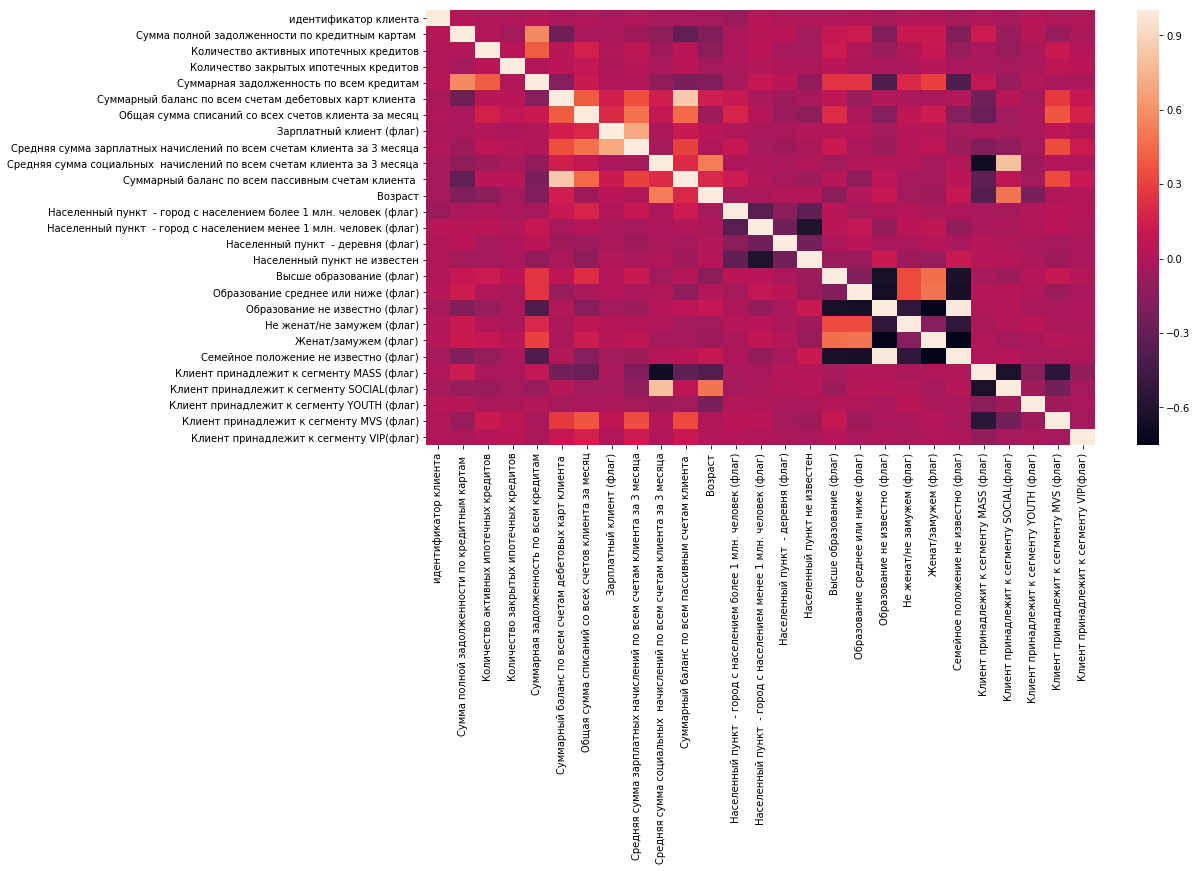

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(data_to_cluster.corr(), xticklabels=1, yticklabels=1)

In [16]:
data_to_cluster = data_to_cluster.drop(columns=['идентификатор клиента'])

### Собственно, кластеризация
Кластеризуйте данные на 9 кластеров. Переменную labels_ обученного кластеризатора передайте в качестве нового столбца датафрейму data.

In [17]:
from sklearn.cluster import KMeans

In [34]:
alg = KMeans(n_clusters=10)
alg.fit(data_to_cluster.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
data['label'] = alg.labels_

In [36]:
data.head()

,идентификатор клиента,Сумма полной задолженности по кредитным картам,Количество активных ипотечных кредитов,Количество закрытых ипотечных кредитов,Суммарная задолженность по всем кредитам,Суммарный баланс по всем счетам дебетовых карт клиента,Общая сумма списаний со всех счетов клиента за месяц,Зарплатный клиент (флаг),Средняя сумма зарплатных начислений по всем счетам клиента за 3 месяца,Средняя сумма социальных начислений по всем счетам клиента за 3 месяца,Суммарный баланс по всем пассивным счетам клиента,Возраст,Населенный пункт - город с населением более 1 млн. человек (флаг),Населенный пункт - город с населением менее 1 млн. человек (флаг),Населенный пункт - деревня (флаг),Населенный пункт не известен,Высше образование (флаг),Образование среднее или ниже (флаг),Образование не известно (флаг),Не женат/не замужем (флаг),Женат/замужем (флаг),Семейное положение не известно (флаг),Клиент принадлежит к сегменту MASS (флаг),Клиент принадлежит к сегменту SOCIAL(флаг),Клиент принадлежит к сегменту YOUTH (флаг),Клиент принадлежит к сегменту MVS (флаг),Клиент принадлежит к сегменту VIP(флаг),label
0,1,35333.89,0,0,35007.29,376.89,34212.66,1,3791.27,0.0,398.75,28.82,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,2
1,2,0.00,0,0,0.00,10584.13,121142.50,1,68893.38,0.0,216130.85,48.80,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,8
2,3,58678.57,0,0,52918.06,25359.44,52833.35,1,40223.53,0.0,25359.44,52.98,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,2
3,4,0.00,0,0,0.00,240478.72,90789.21,1,55271.56,0.0,300579.13,37.66,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,2
4,5,0.00,0,0,0.00,10862.70,51149.80,1,50913.73,0.0,10962.52,47.90,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,2


### Найдём центры кластеров

In [45]:
means = np.stack([data[data['label'] == i].describe().values[1] for i in range(10)])

In [46]:
data['label'].value_counts()

2    26179
3    14751
4    14471
1    11633
8     9350
5     9002
0     8308
7     4136
9     1409
6      759
Name: label, dtype: int64

In [47]:
means = pd.DataFrame(means, columns=data.columns)
means

,идентификатор клиента,Сумма полной задолженности по кредитным картам,Количество активных ипотечных кредитов,Количество закрытых ипотечных кредитов,Суммарная задолженность по всем кредитам,Суммарный баланс по всем счетам дебетовых карт клиента,Общая сумма списаний со всех счетов клиента за месяц,Зарплатный клиент (флаг),Средняя сумма зарплатных начислений по всем счетам клиента за 3 месяца,Средняя сумма социальных начислений по всем счетам клиента за 3 месяца,Суммарный баланс по всем пассивным счетам клиента,Возраст,Населенный пункт - город с населением более 1 млн. человек (флаг),Населенный пункт - город с населением менее 1 млн. человек (флаг),Населенный пункт - деревня (флаг),Населенный пункт не известен,Высше образование (флаг),Образование среднее или ниже (флаг),Образование не известно (флаг),Не женат/не замужем (флаг),Женат/замужем (флаг),Семейное положение не известно (флаг),Клиент принадлежит к сегменту MASS (флаг),Клиент принадлежит к сегменту SOCIAL(флаг),Клиент принадлежит к сегменту YOUTH (флаг),Клиент принадлежит к сегменту MVS (флаг),Клиент принадлежит к сегменту VIP(флаг),label
0,50265.084256,16502.277193,0.215816,0.072581,396917.547587,27433.155741,164007.623312,0.999037,43489.204543,2194.261149,6.074407e+04,39.949972,0.179345,0.460279,0.083173,0.277203,1.000000,0.000000,0.000000,0.000000,0.995426,0.004574,0.570655,0.129393,0.0,0.299952,0.0,0.0
1,49739.951689,7347.909274,0.137626,0.058111,218646.160075,91755.414787,191405.976643,1.000000,67534.030673,4285.542215,3.777171e+05,45.004939,0.191180,0.413049,0.058884,0.336886,0.000860,0.001461,0.997679,0.000000,0.000000,1.000000,0.000430,0.000000,0.0,0.999570,0.0,1.0
2,49196.815310,10815.359820,0.074220,0.029527,88121.592580,18981.529039,60296.282101,1.000000,26860.434392,0.172371,3.825327e+04,40.634289,0.222201,0.000000,0.141182,0.636617,0.001222,0.001948,0.996830,0.000000,0.000000,1.000000,0.996715,0.000000,0.0,0.003285,0.0,2.0
3,50624.175039,12505.878734,0.106637,0.035048,115317.866675,14576.887120,55607.790306,1.000000,23700.601025,2.958881,3.530049e+04,40.393510,0.000000,1.000000,0.000000,0.000000,0.001695,0.003729,0.994577,0.000000,0.000000,1.000000,0.993560,0.001491,0.0,0.004949,0.0,3.0
4,47709.199502,7239.032496,0.045608,0.021491,57626.992347,34475.503460,61115.409027,1.000000,24034.553383,10471.546780,8.026032e+04,53.737994,0.138484,0.348974,0.086380,0.426163,0.001589,0.003317,0.995094,0.000000,0.000000,1.000000,0.000000,0.999378,0.0,0.000622,0.0,4.0
5,52047.321595,16183.052582,0.125417,0.036214,238346.524852,14692.676019,76876.009666,0.999778,28301.877698,2400.355691,2.842205e+04,43.710992,0.105865,0.493002,0.132526,0.268607,0.000000,1.000000,0.000000,0.000000,0.995112,0.004888,0.661964,0.219840,0.0,0.118196,0.0,5.0
6,52729.461133,9482.851436,0.202899,0.160738,464491.793821,245475.878024,713200.809196,0.989460,217408.585072,4881.082055,1.093777e+06,45.372859,0.281950,0.445323,0.028986,0.243742,0.254282,0.040843,0.704875,0.077734,0.214756,0.707510,0.000000,0.000000,0.0,0.000000,1.0,6.0
7,49916.704545,12014.641071,0.097195,0.037476,119296.345447,12801.035317,59764.202372,0.000000,1078.354410,3488.536777,5.682927e+04,41.328034,0.139990,0.438104,0.101789,0.320116,0.080029,0.093327,0.826644,0.063588,0.107350,0.829062,0.675048,0.271760,0.0,0.053191,0.0,7.0
8,51107.250374,17896.158930,0.120428,0.031337,250900.024126,21906.472141,111890.410745,0.999465,32735.446180,2775.475877,5.071691e+04,42.082193,0.176578,0.469519,0.081818,0.272086,0.492193,0.507807,0.000000,1.000000,0.000000,0.000000,0.600535,0.229091,0.0,0.170374,0.0,8.0
9,60860.332150,15498.105245,0.058907,0.005678,127044.554755,12775.588566,77644.185905,0.929737,24797.735053,0.000000,2.465382e+04,24.870078,0.206529,0.405252,0.063165,0.325053,0.209368,0.168204,0.622427,0.224273,0.149752,0.625976,0.000000,0.000000,1.0,0.000000,0.0,9.0


In [48]:
means['Суммарная задолженность по всем кредитам'] + means['Суммарный баланс по всем счетам дебетовых карт клиента '] + means['Суммарный баланс по всем пассивным счетам клиента ']

0    4.850948e+05
1    6.881187e+05
2    1.453564e+05
3    1.651952e+05
4    1.723628e+05
5    2.814612e+05
6    1.803744e+06
7    1.889267e+05
8    3.235234e+05
9    1.644740e+05
dtype: float64

In [49]:
from sklearn.manifold import TSNE

In [50]:
model = TSNE(n_components=2)
data_to_cluster_tsne = model.fit_transform(data_to_cluster[:5000])

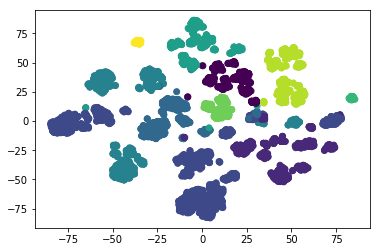

In [51]:
plt.scatter(data_to_cluster_tsne[:5000][:, 0], 
            data_to_cluster_tsne[:5000][:, 1], c=data['label'].values[:5000])


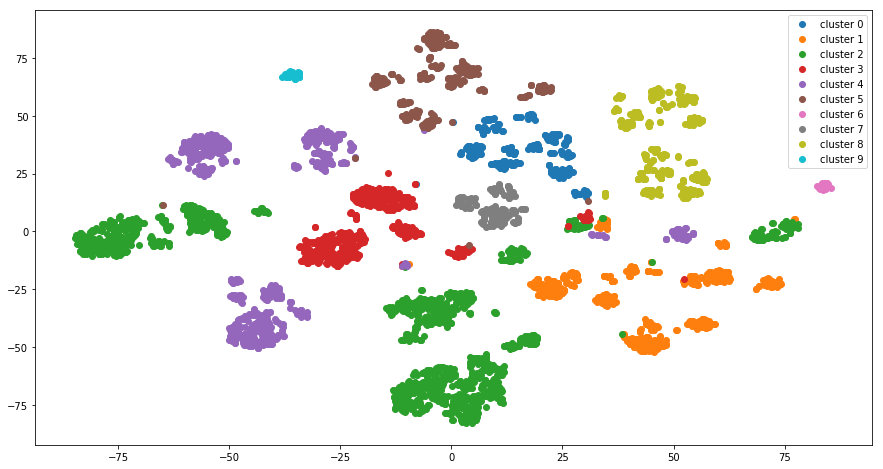

In [52]:
tsne = data_to_cluster_tsne[:5000]
labels = data['label'].values[:5000]

plt.figure(figsize=(15,8))
for i in range(10):
    plt.scatter(tsne[labels == i][:, 0], tsne[labels == i][:, 1], label='cluster ' + str(i))
    plt.legend()
plt.show()